# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# # Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# # Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
     # Group cities in sets of 50 for logging purposes
     if (i % 50 == 0 and i >= 50):
         set_count += 1
         record_count = 0

     # Create endpoint URL with each city
     city_url = base_url + "appid=" + weather_api_key + "&q=" + city

       # Log the url, record, and set numbers
     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
     record_count += 1

    # Run an API request for each of the cities
     try:
          # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(city_weather["dt"])

         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
     except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsh harbour
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | qamdo
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | puerto santa
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | san antonio de pale
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | vadso
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | sakakah
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marsh harbour,26.5412,-77.0636,301.61,59,100,7.36,BS,2023-09-02 19:24:16
1,waitangi,-43.9535,-176.5597,284.16,77,88,0.89,NZ,2023-09-02 19:23:16
2,ancud,-41.8697,-73.8203,279.10,80,53,3.92,CL,2023-09-02 19:24:16
3,ribeira grande,38.5167,-28.7000,294.69,88,11,2.68,PT,2023-09-02 19:24:16
4,adamstown,-25.0660,-130.1015,291.94,80,100,5.30,PN,2023-09-02 19:24:17


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsh harbour,26.5412,-77.0636,301.61,59,100,7.36,BS,2023-09-02 19:24:16
1,waitangi,-43.9535,-176.5597,284.16,77,88,0.89,NZ,2023-09-02 19:23:16
2,ancud,-41.8697,-73.8203,279.10,80,53,3.92,CL,2023-09-02 19:24:16
3,ribeira grande,38.5167,-28.7000,294.69,88,11,2.68,PT,2023-09-02 19:24:16
4,adamstown,-25.0660,-130.1015,291.94,80,100,5.30,PN,2023-09-02 19:24:17


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The plot indicates that as the distance from the equator increases, temperature drops.


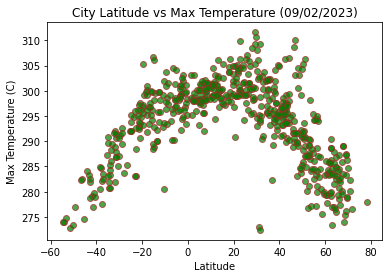

In [8]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), 
            facecolors="green", edgecolors="brown", alpha = 0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot indicates that as the distance from the equator increases, temperature drops.")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

As per the plot there does not seem to be any relationship between latitude and humidity.


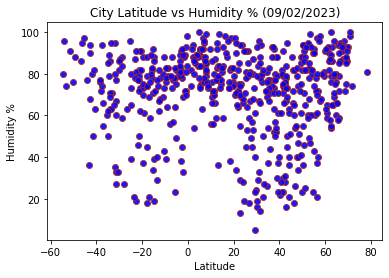

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), 
            facecolors="blue", edgecolors="brown", alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs Humidity % ({today})")
print("As per the plot there does not seem to be any relationship between latitude and humidity.")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The plot does not show any pattern as such of any relationship between latitude and cloudiness.


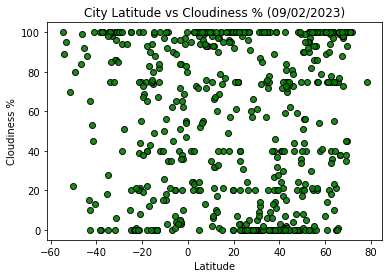

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float), 
            facecolors="green", edgecolors="black", alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs Cloudiness % ({today})")
print("The plot does not show any pattern as such of any relationship between latitude and cloudiness.")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

From the plot figure we can see there is no real pattern between latitude and wind speed.


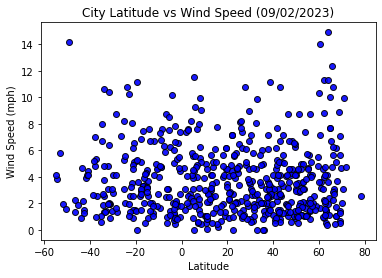

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float), 
            facecolors="blue", edgecolors="black", alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("From the plot figure we can see there is no real pattern between latitude and wind speed.")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsh harbour,26.5412,-77.0636,301.61,59,100,7.36,BS,2023-09-02 19:24:16
3,ribeira grande,38.5167,-28.7000,294.69,88,11,2.68,PT,2023-09-02 19:24:16
6,wailua homesteads,22.0669,-159.3780,303.59,72,75,7.20,US,2023-09-02 19:24:17
7,qamdo,31.1667,97.2333,273.10,67,9,0.64,CN,2023-09-02 19:24:17
8,albany,42.6001,-73.9662,296.51,75,100,1.39,US,2023-09-02 19:24:17


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,284.16,77,88,0.89,NZ,2023-09-02 19:23:16
2,ancud,-41.8697,-73.8203,279.10,80,53,3.92,CL,2023-09-02 19:24:16
4,adamstown,-25.0660,-130.1015,291.94,80,100,5.30,PN,2023-09-02 19:24:17
5,puerto natales,-51.7236,-72.4875,272.75,91,70,1.95,CL,2023-09-02 19:24:17
9,puerto santa,-8.9906,-78.6456,293.51,83,3,4.72,PE,2023-09-02 19:24:18


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.31 x + 305.63
The r-squared is: -0.7271737057076157
The regression shows a negative correlation.
In the nothern hemisphere, as the distance from the equator increases, the temperature decreases.


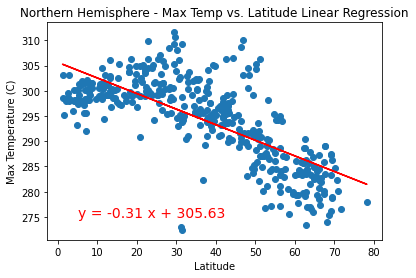

In [15]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.annotate(line_eq,(5,275),fontsize=14,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a negative correlation.")
print("In the nothern hemisphere, as the distance from the equator increases, the temperature decreases.")
plt.show()

Regression line equation is: y = 0.45 x + 301.55
The r-squared is: 0.8317217727876137
The regression shows a positive correlation.
In the southern hemisphere, the closer the area to the equator, the higher the temperature.


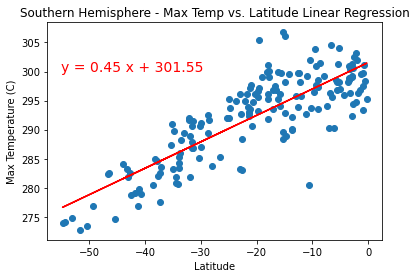

In [16]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='red')
plt.annotate(line_eq,(-55,300),fontsize=14,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("The regression shows a positive correlation.")
print("In the southern hemisphere, the closer the area to the equator, the higher the temperature.")
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
The regression shows a negative correlation. In the nothern hemisphere, as the distance from the equator increases, the temperature decreases.

Southern Hemisphere - Max Temp vs. Latitude Linear Regression
The regression shows a positive correlation.In the southern hemisphere, the closer the area to the equator, the higher the temperature.


### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.04x + 72.92
The r-squared is: -0.039143259738688145
The regression displays there is no correlation between northern hemisphere humidity levels and latitude.


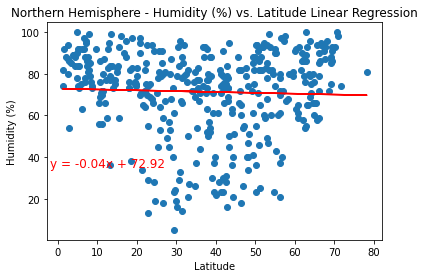

In [17]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-2,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays there is no correlation between northern hemisphere humidity levels and latitude.") 
plt.show()

Regression line equation is: y = -0.03x + 70.4
The r-squared is: -0.02268609521501816
The regression displays there is no correlation between southern hemisphere humidity levels and latitude.


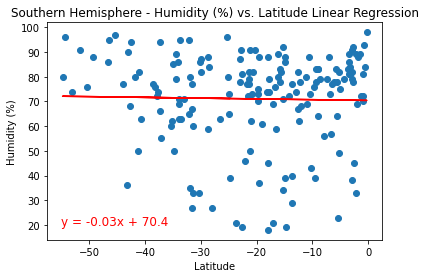

In [18]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays there is no correlation between southern hemisphere humidity levels and latitude.") 
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The regression displays there is no correlation between northern hemisphere humidity levels and latitude.

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The regression displays there is no correlation between southern hemisphere humidity levels and latitude.


### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 52.48
The r-squared is: 0.005906380722470018
The regression displays there is no correlation between northern hemisphere cloudiness levels and latitude.


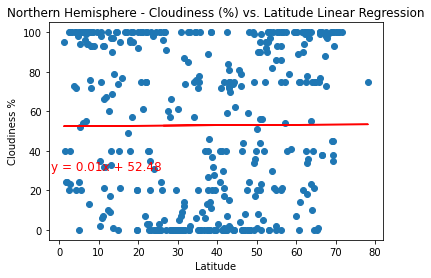

In [19]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-2,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays there is no correlation between northern hemisphere cloudiness levels and latitude.") 
plt.show()

Regression line equation is: y = -0.54x + 44.5
The r-squared is: -0.20065960092010396
The regression displays there is not much correlation between southern hemisphere cloudiness levels and latitude.


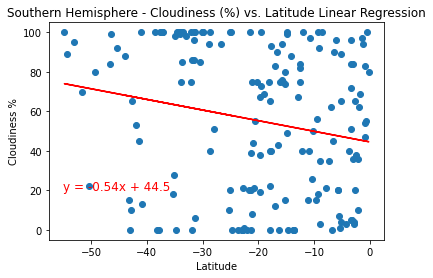

In [20]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays there is not much correlation between southern hemisphere cloudiness levels and latitude.") 
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
The regression displays there is no correlation between northern hemisphere cloudiness levels and latitude.

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
The regression displays there is not much correlation between southern hemisphere cloudiness levels and latitude. 


### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.0x + 3.48
The r-squared is: 0.03648910332952881
The regression does not display much of a correlation between the northern hemisphere wind speed and latitude.


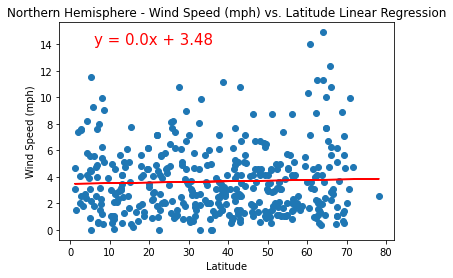

In [21]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the northern hemisphere wind speed and latitude.")
plt.show()

Regression line equation is: y = -0.0x + 3.84
The r-squared is: -0.0010884996161867994
The regression does not display much of a correlation between the southern hemisphere wind speed and latitude.


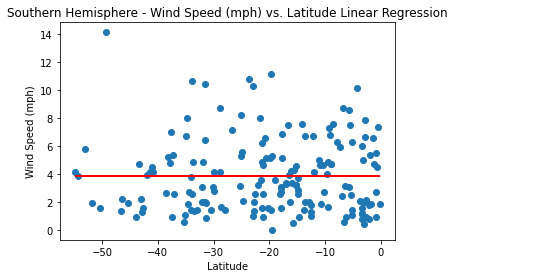

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the southern hemisphere wind speed and latitude.")
plt.show()

**Discussion about the linear relationship:** 

The regression does not indicate correlation with Northern hemisphere wind speed or the Southern hemisphere wind speed.